In [32]:
import os
import time
import random
import torch
import mrcfile
import numpy as np
from torch import nn
from math import ceil
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch import FloatTensor as FT
from torch.autograd import Variable as V
from concurrent.futures import ThreadPoolExecutor
from utils import *

rawData = "/home/tyche/paddle_SN2N/raw_data/"
Datasets = "/home/tyche/paddle_SN2N/datasets/"


def get_all_files(directory):
    file_list = list()
    n_files = 0
    for file in os.listdir(directory):
        file_list.append(f"{directory}/{file}")
        n_files += 1
    return file_list, n_files

In [3]:
files, n_files = get_all_files(f"{rawData}/..")
print(files, n_files)
print(len(files))

['/home/tyche/paddle_SN2N/raw_data//../utils.py', '/home/tyche/paddle_SN2N/raw_data//../datasets', '/home/tyche/paddle_SN2N/raw_data//../.gitignore', '/home/tyche/paddle_SN2N/raw_data//../.git', '/home/tyche/paddle_SN2N/raw_data//../test.ipynb', '/home/tyche/paddle_SN2N/raw_data//../raw_data'] 6
6


In [30]:
kernel = torch.tensor([[[[1, 0], [0, 1]], [[0, 1], [1, 0]]],
                       [[[0, 1], [1, 0]], [[1, 0], [0, 1]]]])
kernel.shape

torch.Size([2, 2, 2, 2])

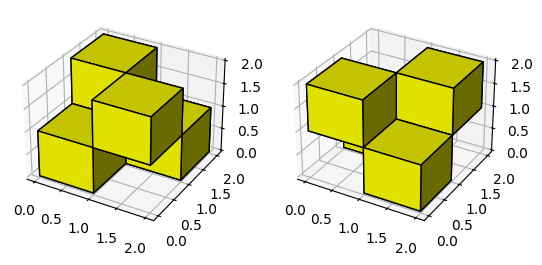

In [31]:
data = np.random.choice([0, 1], size=(5, 5, 5))

fig = plt.figure()
ax0 = fig.add_subplot(121, projection='3d')
ax0.voxels(kernel[0], facecolors='yellow', edgecolor='k')

ax1 = fig.add_subplot(122, projection='3d')
ax1.voxels(kernel[1], facecolors='yellow', edgecolor='k')

plt.show()

In [ ]:
x = torch.randn(1, 1, 5, 5)  # 输入张量 [批次大小, 通道数, 高度, 宽度]

kernel = torch.tensor([[[[1, 0], [0, 1]], [[0, 1], [1, 0]]], 
                       [[[0, 1], [1, 0]], [[1, 0], [0, 1]]]])